# Recurrent Networks > Artificial Time Series example

- The Narrowing Cosine example:
    - How to apply MLP, RNN, LSTM, GRU to time series prediction
    - Which one works best on this data?
    - Why?
    
- Conlusions are
    - MLP > GRU > LSTM > RNN
    
- RNN tend not to be better than MLP in autoregressive problems
    - Empirical evidence

In [110]:
import numpy as np

def gen_series(amp = 100, period = 1000, x0 = 0, xn = 50000, step = 1, k = 0.0001):
    n = (xn-x0) * step
    cos = np.array([0]*n)
    for i in range(len(cos)):
        idx = x0 + i * step
        cos[i] = amp * np.cos(2 * np.pi * idx / period)
        cos[i] = cos[i] * np.exp(-k * idx)
    return cos

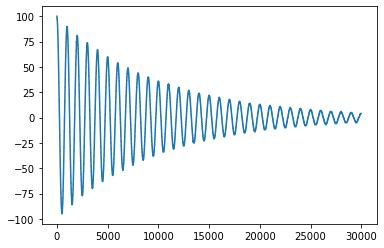

In [111]:
import matplotlib.pyplot as plt

plt.plot(gen_series(xn=30000));

In [112]:
def prep_data(data, max_len=10, stride=1, lahead=1):
    start_indexes = np.arange(0, len(data) - (max_len + lahead), step = stride)
    data_matrix = np.zeros(shape=(len(start_indexes),max_len+1))
    
    for i in range(len(start_indexes)):
        xpart=data[start_indexes[i]:(start_indexes[i]+max_len)]
        ypart=data[start_indexes[i]+max_len+lahead]
        data_matrix[i,] = np.hstack((xpart,ypart))
 
    # remove rows with at least one NaN
    data_matrix = data_matrix[~np.isnan(data_matrix).any(axis=1)]
    
    return data_matrix[:,:-1],data_matrix[:,-1]
   
cosser = gen_series(xn=20)
prep_data(cosser,max_len=3)

(array([[100.,  98.,  98.],
        [ 98.,  98.,  98.],
        [ 98.,  98.,  98.],
        [ 98.,  98.,  98.],
        [ 98.,  98.,  98.],
        [ 98.,  98.,  98.],
        [ 98.,  98.,  98.],
        [ 98.,  98.,  98.],
        [ 98.,  98.,  98.],
        [ 98.,  98.,  98.],
        [ 98.,  98.,  98.],
        [ 98.,  98.,  98.],
        [ 98.,  98.,  98.],
        [ 98.,  98.,  98.],
        [ 98.,  98.,  98.],
        [ 98.,  98.,  98.]]),
 array([98., 98., 98., 98., 98., 98., 98., 98., 98., 98., 98., 98., 98.,
        98., 98., 98.]))

In [113]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import SimpleRNN
from keras.utils import np_utils

In [128]:
rnn_units = 50
batch_size = 1
total_epochs = 5
window = 10

cosser = gen_series(xn=10000)
lcos=len(cosser)


cosf = cosser[0:int(lcos*0.8)]
cosv = cosser[int(lcos*0.8):int(lcos*0.9)]
cost = cosser[int(lcos*0.9):lcos]

Xflatf,yf = prep_data(cosf, max_len=window, lahead=10)
Xflatv,yv = prep_data(cosv, max_len=window, lahead=10)
Xflatt,yt = prep_data(cost, max_len=window, lahead=10)

Xf = np.reshape(Xflatf, (Xflatf.shape[0], 1, Xflatf.shape[1]))
Xv = np.reshape(Xflatv, (Xflatv.shape[0], 1, Xflatv.shape[1]))
Xt = np.reshape(Xflatt, (Xflatt.shape[0], 1, Xflatt.shape[1]))

Epoch 1/5
7980/7980 [==============================] - 9s 1ms/step - loss: 606.7664 - mse: 606.7664 - val_loss: 15.0024 - val_mse: 15.0024
Epoch 2/5
7980/7980 [==============================] - 8s 963us/step - loss: 130.9372 - mse: 130.9372 - val_loss: 16.0403 - val_mse: 16.0403
Epoch 3/5
7980/7980 [==============================] - 7s 858us/step - loss: 131.6763 - mse: 131.6763 - val_loss: 36.3382 - val_mse: 36.3382
Epoch 4/5
7980/7980 [==============================] - 7s 845us/step - loss: 125.7851 - mse: 125.7851 - val_loss: 13.4869 - val_mse: 13.4869
Epoch 5/5
7980/7980 [==============================] - 7s 875us/step - loss: 134.0581 - mse: 134.0581 - val_loss: 31.6713 - val_mse: 31.6713


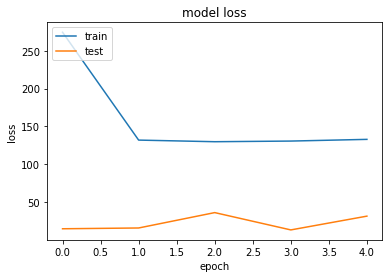

In [114]:
model = Sequential()

model.add(SimpleRNN(units = rnn_units, input_shape = (1,window)))
model.add(Dense(units = 1)) 

model.compile(loss = 'mse', 
                  optimizer = 'RMSprop', 
                  metrics = ['mse'])
  
history = model.fit(Xf,yf,
  batch_size = batch_size, 
  epochs = total_epochs,
  validation_data=(Xv,yv)
)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

RNN RMSE = 6.01381095454242


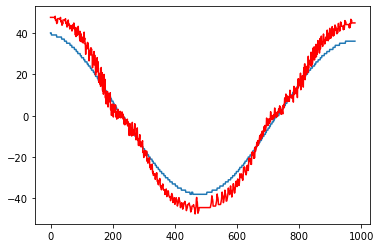

In [115]:
from sklearn.metrics import mean_squared_error as MSE

y_predt_rnn = model.predict(Xt)

plt.plot(yt)
plt.plot(y_predt_rnn,color='red')

print("RNN RMSE =",MSE(y_predt_rnn,yt)**.5)

In [116]:
from keras.layers import LSTM
model_lstm = Sequential()

model_lstm.add(LSTM(units = rnn_units, input_shape = (1,window)))
model_lstm.add(Dense(units = 1)) 

model_lstm.compile(loss = 'mse', 
                  optimizer = 'RMSprop', 
                  metrics = ['mse'])
  
history = model_lstm.fit(Xf,yf,
  batch_size = batch_size, 
  epochs = total_epochs,
  validation_data=(Xv,yv)
)

Epoch 1/5
7980/7980 [==============================] - 13s 1ms/step - loss: 1258.9828 - mse: 1258.9828 - val_loss: 66.0757 - val_mse: 66.0757
Epoch 2/5
7980/7980 [==============================] - 10s 1ms/step - loss: 121.8172 - mse: 121.8172 - val_loss: 46.9783 - val_mse: 46.9783
Epoch 3/5
7980/7980 [==============================] - 10s 1ms/step - loss: 80.9390 - mse: 80.9390 - val_loss: 55.6196 - val_mse: 55.6196
Epoch 4/5
7980/7980 [==============================] - 11s 1ms/step - loss: 67.0620 - mse: 67.0620 - val_loss: 40.3980 - val_mse: 40.3980
Epoch 5/5
7980/7980 [==============================] - 10s 1ms/step - loss: 63.8338 - mse: 63.8338 - val_loss: 56.3429 - val_mse: 56.3429


LSTM RMSE = 6.961479527820306


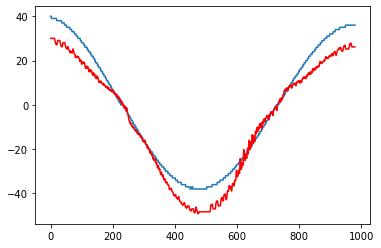

In [117]:
y_predt_lstm = model_lstm.predict(Xt)

plt.plot(yt)
plt.plot(y_predt_lstm,color='red')

print("LSTM RMSE =",MSE(y_predt_lstm,yt)**.5)

In [129]:
from keras.layers import GRU

model_gru = Sequential()

model_gru.add(GRU(units = rnn_units, input_shape = (1,window)))
model_gru.add(Dense(units = 1)) 

model_gru.compile(loss = 'mse', 
                  optimizer = 'RMSprop', 
                  metrics = ['mse'])
  
history = model_gru.fit(Xf,yf,
  batch_size = batch_size, 
  epochs = total_epochs,
  validation_data=(Xv,yv)
)

Epoch 1/5
7980/7980 [==============================] - 12s 1ms/step - loss: 830.3160 - mse: 830.3160 - val_loss: 28.3407 - val_mse: 28.3407
Epoch 2/5
7980/7980 [==============================] - 11s 1ms/step - loss: 107.0213 - mse: 107.0213 - val_loss: 28.7536 - val_mse: 28.7536
Epoch 3/5
7980/7980 [==============================] - 10s 1ms/step - loss: 76.8300 - mse: 76.8300 - val_loss: 11.6458 - val_mse: 11.6458
Epoch 4/5
7980/7980 [==============================] - 10s 1ms/step - loss: 50.3804 - mse: 50.3804 - val_loss: 50.5073 - val_mse: 50.5073
Epoch 5/5
7980/7980 [==============================] - 10s 1ms/step - loss: 42.7369 - mse: 42.7369 - val_loss: 48.8412 - val_mse: 48.8412


GRU RMSE = 6.858880942982779


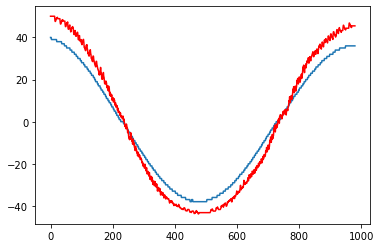

In [130]:
y_predt_gru = model_gru.predict(Xt)

plt.plot(yt)
plt.plot(y_predt_gru,color='red')

print("GRU RMSE =",MSE(y_predt_gru,yt)**.5)

In [133]:
model_mlp = Sequential()

model_mlp.add(Dense(units = rnn_units, input_dim = window))
model_mlp.add(Dense(units = 1)) 

model_mlp.compile(loss = 'mse', 
                  optimizer = 'RMSprop', 
                  metrics = ['mse'])
  
history = model_mlp.fit(Xflatf,yf,
  batch_size = batch_size, 
  epochs = total_epochs,
  validation_data=(Xflatv,yv)
)

Epoch 1/20
7980/7980 [==============================] - 6s 754us/step - loss: 25.7159 - mse: 25.7159 - val_loss: 0.7729 - val_mse: 0.7729
Epoch 2/20
7980/7980 [==============================] - 6s 699us/step - loss: 6.9493 - mse: 6.9493 - val_loss: 9.8737 - val_mse: 9.8737
Epoch 3/20
7980/7980 [==============================] - 6s 694us/step - loss: 3.8715 - mse: 3.8715 - val_loss: 1.2895 - val_mse: 1.2895
Epoch 4/20
7980/7980 [==============================] - 5s 685us/step - loss: 2.8012 - mse: 2.8012 - val_loss: 1.0369 - val_mse: 1.0369
Epoch 5/20
7980/7980 [==============================] - 5s 688us/step - loss: 2.4741 - mse: 2.4741 - val_loss: 0.6587 - val_mse: 0.6587
Epoch 6/20
7980/7980 [==============================] - 5s 680us/step - loss: 2.2432 - mse: 2.2432 - val_loss: 1.9351 - val_mse: 1.9351
Epoch 7/20
7980/7980 [==============================] - 6s 695us/step - loss: 2.0436 - mse: 2.0436 - val_loss: 1.1636 - val_mse: 1.1636
Epoch 8/20
7980/7980 [========================

MLP RMSE = 0.7531152816380403


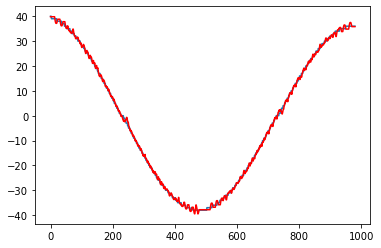

In [134]:
y_predt_mlp = model_mlp.predict(Xflatt)

plt.plot(yt)
plt.plot(y_predt_mlp,color='red')

print("MLP RMSE =",MSE(y_predt_mlp,yt)**.5)

Epoch 1/20
7980/7980 [==============================] - 13s 1ms/step - loss: 570.4264 - mse: 570.4264 - val_loss: 56.4784 - val_mse: 56.4784
Epoch 2/20
7980/7980 [==============================] - 12s 2ms/step - loss: 99.2778 - mse: 99.2778 - val_loss: 30.9088 - val_mse: 30.9088
Epoch 3/20
7980/7980 [==============================] - 11s 1ms/step - loss: 65.1284 - mse: 65.1284 - val_loss: 8.6658 - val_mse: 8.6658
Epoch 4/20
7980/7980 [==============================] - 12s 1ms/step - loss: 43.6911 - mse: 43.6911 - val_loss: 3.5264 - val_mse: 3.5264
Epoch 5/20
7980/7980 [==============================] - 11s 1ms/step - loss: 32.2869 - mse: 32.2869 - val_loss: 4.8230 - val_mse: 4.8230
Epoch 6/20
7980/7980 [==============================] - 11s 1ms/step - loss: 27.8057 - mse: 27.8057 - val_loss: 3.5813 - val_mse: 3.5813
Epoch 7/20
7980/7980 [==============================] - 10s 1ms/step - loss: 23.5677 - mse: 23.5677 - val_loss: 6.7469 - val_mse: 6.7469
Epoch 8/20
7980/7980 [=============

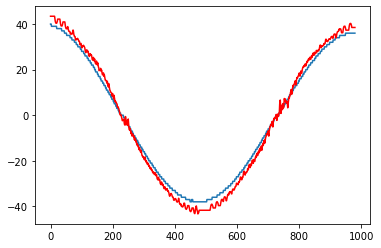

In [132]:
rnn_units = 100
batch_size = 1
total_epochs = 20
window = 10

model_gru = Sequential()

model_gru.add(GRU(units = rnn_units, input_shape = (1,window)))
model_gru.add(Dense(units = 1)) 

model_gru.compile(loss = 'mse', 
                  optimizer = 'RMSprop', 
                  metrics = ['mse'])
  
history = model_gru.fit(Xf,yf,
  batch_size = batch_size, 
  epochs = total_epochs,
  validation_data=(Xv,yv)
)

y_predt_gru = model_gru.predict(Xt)

plt.plot(yt)
plt.plot(y_predt_gru,color='red')

print("GRU RMSE =",MSE(y_predt_gru,yt)**.5)

https://machinelearningmastery.com/suitability-long-short-term-memory-networks-time-series-forecasting/